# Assignment #8 - Data Gathering and Warehousing - DSSA-5102

Instructor: Melissa Laurino<br>
Spring 2025<br>

Name: Thompson Morgan
<br>
Date: 4/10/25
<br>
<br>
**At this time in the semester:** <br>
- We have explored a dataset. <br>
- We have cleaned our dataset. <br>
- We created a Github account with a repository for this class and included a metadata read me file about our data. <br>
- We introduced general SQL syntax, queries, and applications in Python.<br>
- Created our own databases from scratch using MySQL Workbench and Python with SQLAlchemy on our local server and locally on our machine.
- Populated our databases with the data we cleaned at the start of the semester.
<br>

Now we will **JOIN** our knowledge and tables to answer more complex questions about our dataset! We will practice joining tables and understand the importance of using different commands.<br>

JOIN statements are used to combine results from two or more tables based on a related column between them.<br>

Review the powerpoint and readings specified on Blackboard.<br>

In the event your database does not meet the requirements below to answer the question, please use the database provided in Assignment #4 and #5. Remember to credit your data source. <br>

Follow the instructions below to complete the assignment. Write your question you are answering with your data query and visualize your results in a way that fits your data. <br>
Be sure to comment **all** code and answer **all** questions in markdown for full credit.<br>

**Data origin:** <br>
I am using the murder mystery database provided in Assignment #4 and #5. This database was created by @NUKnightLab on Github and can be found here: https://github.com/NUKnightLab/sql-mysteries

In [2]:
# Load necessary packages:
from sqlalchemy import create_engine, inspect, text # Database navigation
import sqlite3 # A second option for working with databases
import pandas as pd # Python data manilpulation
import matplotlib.pyplot as plt # For graphing

In [4]:
# Connect to our .db file using library SQLAlchemy
db_path = "sql-murder-mystery.db"
engine = create_engine(f"sqlite:///{db_path}") # Use the create_engine function to connect to the database

#### INNER JOIN (or JOIN)
Display matching records from TWO tables! Choose to combine two tables using inner join. <br>
Write your question you are answering with your data query and visualize your results. <br>
<br>
**Question:** Which membership status had the most check-ins in January 2018?
<br>
**What tables are we joining?** get_fit_now_member, get_fit_now_check_in

In [6]:
with engine.connect() as connection: # Establish a connection
    inner = text("""SELECT get_fit_now_member.membership_status, COUNT(*) AS count
                    FROM get_fit_now_member
                    INNER JOIN get_fit_now_check_in ON get_fit_now_member.id = get_fit_now_check_in.membership_id
                    WHERE get_fit_now_check_in.check_in_date BETWEEN 20180101 AND 20180131
                    GROUP BY get_fit_now_member.membership_status
                    ORDER BY count DESC
                    """) # Define the query - text() ensures that the query string is read as a SQL expression
    inner = pd.read_sql(inner, connection) # Use pandas to read the sql query with the connection to the database

# Print the results
inner

,membership_status,count
0,silver,69
1,regular,65
2,gold,52


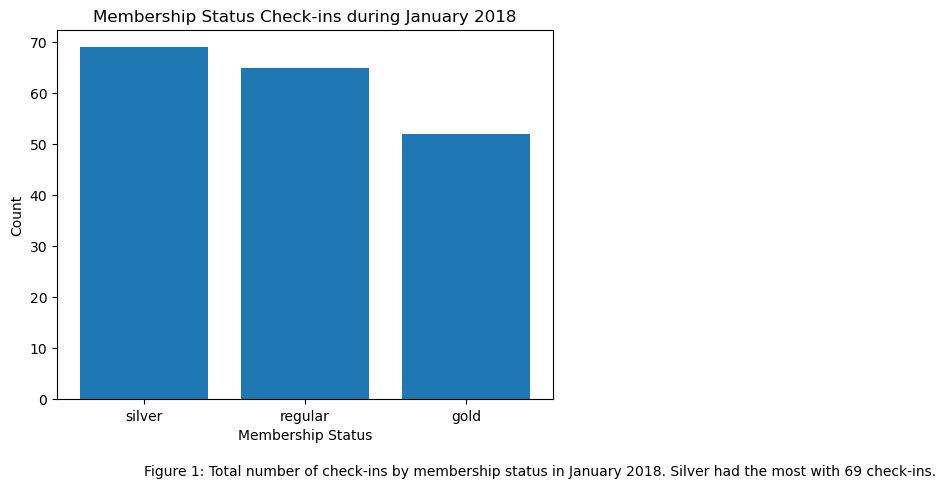

In [8]:
# Visualize your results:
plt.bar(inner['membership_status'], inner['count']) # Create a bar graph with the 'membership_status' column as the x-axis and 'count' column as the y-axis
plt.xlabel("Membership Status") # Label x-axis
plt.ylabel("Count") # Label y-axis
plt.title("Membership Status Check-ins during January 2018") # Add a title
plt.text(0, -15, "Figure 1: Total number of check-ins by membership status in January 2018. Silver had the most with 69 check-ins.") # Add a caption
plt.show() # Show the graph

#### LEFT JOIN
<br>
Returns ALL records from the left table and matching records from the right table. Write your question you are answering with your data query and visualize your results.
<br><br>
<b>Question:</b> Who attended the most Facebook events during the month of December 2017?
<br>
<b>What tables are we joining?</b> person, facebook_event_checkin

In [10]:
with engine.connect() as connection: # Establish a connection
    left = text("""SELECT person.name, COUNT(*) AS count
                   FROM person
                   LEFT JOIN facebook_event_checkin ON person.id = facebook_event_checkin.person_id
                   WHERE facebook_event_checkin.date BETWEEN 20171201 AND 20171231
                   GROUP BY person.name
                   ORDER BY count DESC
                   LIMIT 5
                    """) # Define the query - text() ensures that the query string is read as a SQL expression
    left = pd.read_sql(left, connection) # Use pandas to read the sql query with the connection to the database

# Print the results
left

,name,count
0,Miranda Priestly,3
1,Jarred Kwiecinski,3
2,Elidia Johnstone,3
3,Bryan Pardo,3
4,Wilford Frazzano,2


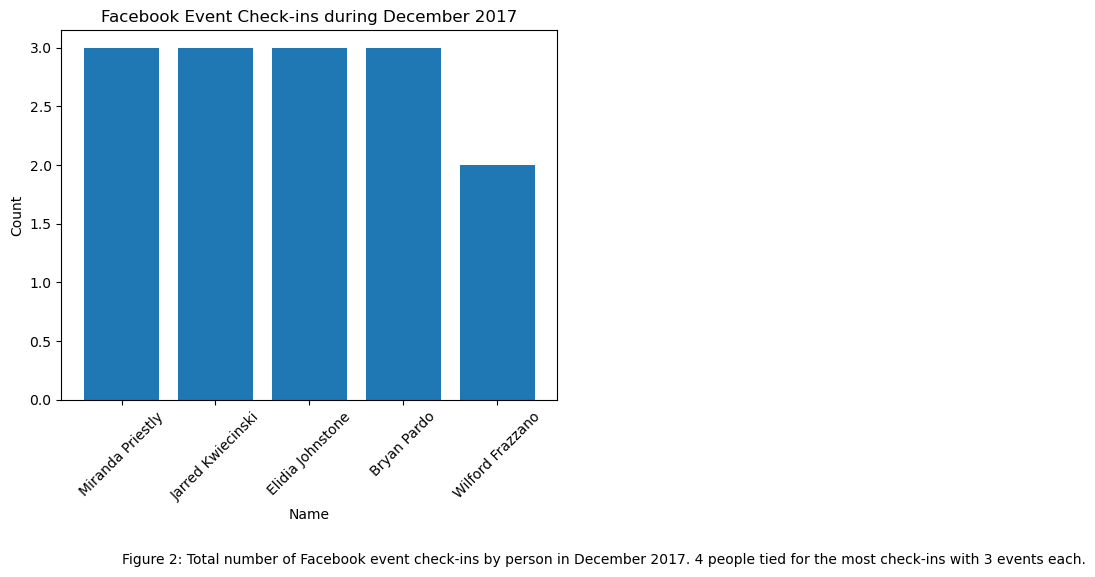

In [12]:
# Visualize your results:
plt.bar(left['name'], left['count']) # Create a bar graph with the 'name' column as the x-axis and 'count' column as the y-axis
plt.xlabel("Name") # Label x-axis
plt.xticks(rotation=45) # Rotate the names
plt.ylabel("Count") # Label y-axis
plt.title("Facebook Event Check-ins during December 2017") # Add a title
plt.text(0, -1.4, "Figure 2: Total number of Facebook event check-ins by person in December 2017. 4 people tied for the most check-ins with 3 events each.") # Add a caption
plt.show() # Show the graph

#### RIGHT JOIN
<br>
Returns ALL records from the right table and matching records from the left table. Write your question you are answering with your data query and visualize your results. <br>
<br>
<b>Question:</b> Who has the largest annual income in the database?
<br>
<b>What tables are we joining?</b> person, income

In [14]:
with engine.connect() as connection: # Establish a connection
    right = text("""SELECT person.name, income.annual_income
                    FROM person
                    RIGHT JOIN income ON person.ssn = income.ssn
                    ORDER BY income.annual_income DESC
                    LIMIT 5
                    """) # Define the query - text() ensures that the query string is read as a SQL expression
    right = pd.read_sql(right, connection) # Use pandas to read the sql query with the connection to the database

# Print the results
right

,name,annual_income
0,Numbers Cranker,498500
1,Truman Haaker,489800
2,Felice Prudden,486600
3,Dianna Eyster,476300
4,Buena Cosimini,475700


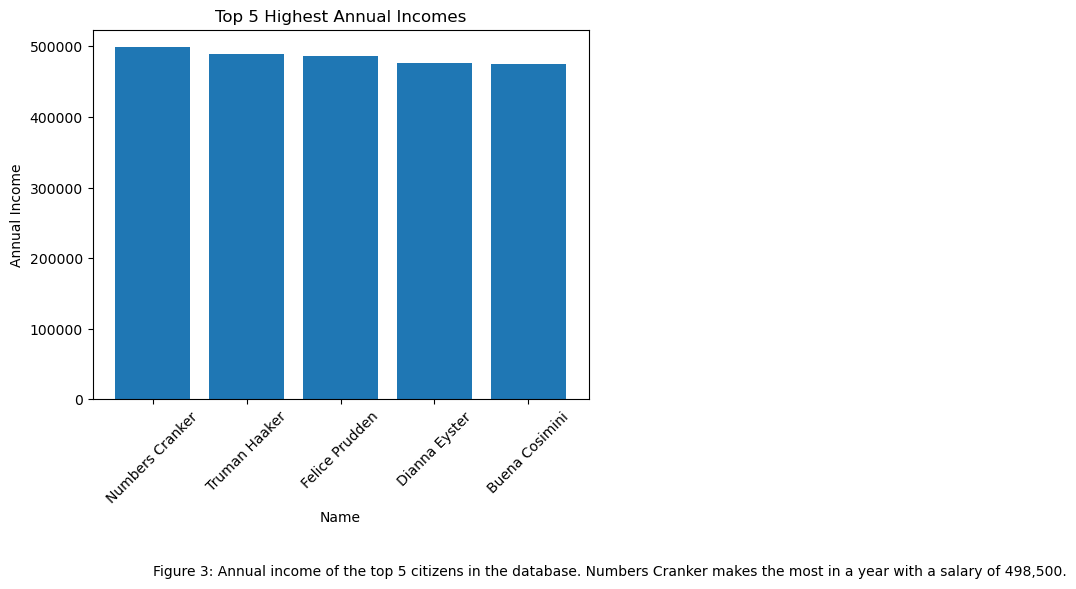

In [16]:
# Visualize your results:
plt.bar(right['name'], right['annual_income']) # Create a bar graph with the 'name' column as the x-axis and 'annual_income' column as the y-axis
plt.xlabel("Name") # Label x-axis
plt.xticks(rotation=45) # Rotate the names
plt.ylabel("Annual Income") # Label y-axis
plt.title("Top 5 Highest Annual Incomes") # Add a title
plt.text(0, -250000, "Figure 3: Annual income of the top 5 citizens in the database. Numbers Cranker makes the most in a year with a salary of 498,500.") # Add a caption
plt.show() # Show the graph

#### FULL JOIN or UNION of RIGHT JOIN and LEFT JOIN
<br>
Can answer multiple objectives at the same time! Not recommended for large databases. Results may slow your machine or quit before finishing. Write your question you are answering with your data query and visualize your results. <br>
<br>
<b>Question:</b> What is the most common car make in the database?
<br>
<b>What tables are we joining?</b> drivers_license, person

In [18]:
with engine.connect() as connection: # Establish a connection
    full = text("""SELECT drivers_license.car_make, COUNT(*) AS count
                    FROM drivers_license
                    FULL OUTER JOIN person ON drivers_license.id = person.license_id
                    GROUP BY drivers_license.car_make
                    ORDER BY count DESC
                    LIMIT 10
                    """) # Define the query - text() ensures that the query string is read as a SQL expression
    full = pd.read_sql(full, connection) # Use pandas to read the sql query with the connection to the database

# Print the results
full

,car_make,count
0,Chevrolet,792
1,Ford,764
2,Toyota,570
3,GMC,508
4,Dodge,454
5,BMW,394
6,Mercedes-Benz,353
7,Nissan,335
8,Lexus,316
9,Mazda,313


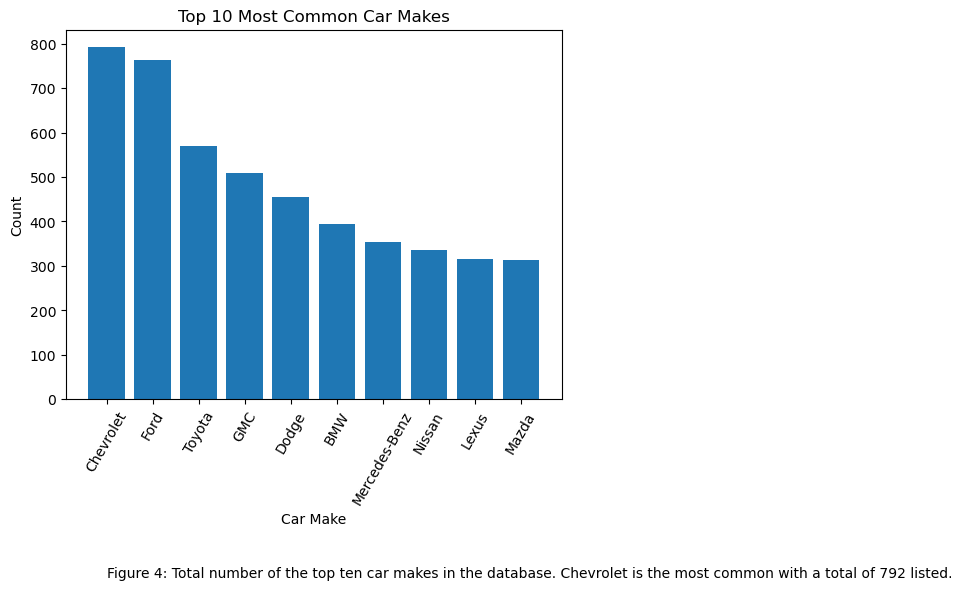

In [20]:
# Visualize your results:
plt.bar(full['car_make'], full['count']) # Create a bar graph with the 'car_make' column as the x-axis and 'count' column as the y-axis
plt.xlabel("Car Make") # Label x-axis
plt.xticks(rotation=60) # Rotate the names
plt.ylabel("Count") # Label y-axis
plt.title("Top 10 Most Common Car Makes") # Add a title
plt.text(0, -400, "Figure 4: Total number of the top ten car makes in the database. Chevrolet is the most common with a total of 792 listed.") # Add a caption
plt.show() # Show the graph

In [22]:
# Close your connection :)
connection.close()